In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time


In [13]:
# Define constants, but we do it as a class (to later make passing it around easier)

class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_animals_max = 300
        self.n_animals_start = 300  # Original n_animals
        self.n_steps = 1000
        self.n_steps_quarentine = 200
        self.vmin = 0.01
        self.qmin = 0.001
        self.vmax = 5*self.vmin
        self.v_decay = 0.7
        self.arena_size = 4
        self.hp_baby = 20
        self.hp_reproduction = 39
        self.hp_birthcost = 20        
        self.hp_leak = 0.5
        self.contagion_distance = 0.01**1

In [14]:
# Build the model
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, c.n_steps_quarentine, n_trials))

    for i_trial in range(n_trials):
        # Allocate hp for all animals, but only first few are alive
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low=c.hp_baby, high=c.hp_reproduction, size=c.n_animals_start)
        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        infected = np.zeros(c.n_animals_max)
        infected[0] = 1 #Patient zero 
    
    
        n_animals = np.zeros(c.n_steps)

        if show_dotses: # Init plots
            fig = plt.figure(figsize=(4,4))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = vx*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin
            # Make them run around (keeps speed somewhat randomized)
            
            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_animals_max):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
            
            potential_babies = np.argwhere(hp<=0)
            baby_counter = 0
            for i_animal in np.argwhere(hp>0): # <---- This gains about a second of performance                    
        
                
           
                n_animals[t] = np.sum(hp>0)
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'k.',markersize=4);
                plt.plot(x[infected==0],y[infected==0],'k.', markersize=4)
                plt.plot(x[infected==1],y[infected==1],'r.', markersize=4)
                plt.xlim((0,c.arena_size))
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                print('.',end='')
        # --- Time loop is over

        #history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


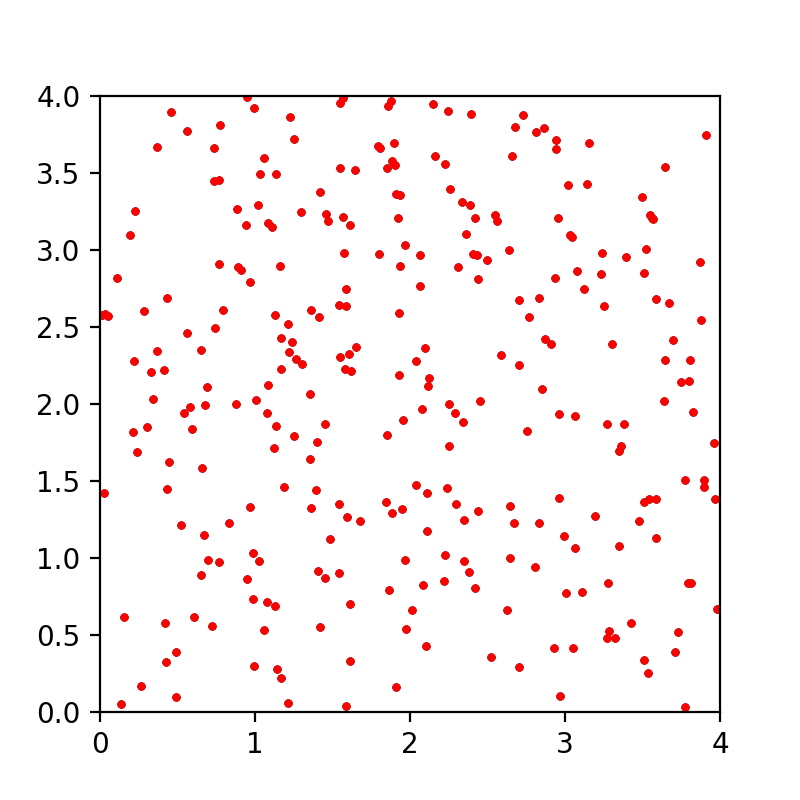

CPU times: user 1min, sys: 1.56 s, total: 1min 2s
Wall time: 1min 1s


In [15]:
c = Const()
np.random.seed(1)
%time curve = model(c, show_dotses=True);